<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/SampleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**DATASET**

The Algerian Forest Fires dataset contains meteorological observations and Forest Fire Weather Index (FWI) components from two regions in Algeria: the Bejaia region (Northeast) and the Sidi Bel-Abbès region (Northwest), each contributing 122 instances, totaling 244 instances. Data was collected on a daily basis during the high-risk fire period (June to September 2012).

This dataset has 11 input features: Temperature, Relative Humidity (RH), Wind Speed (Ws), Rainfall, and the FWI components, which include FFMC, DMC, DC, ISI, BUI, and FWI. The target label is binary: "fire" (138 instances) or "not fire" (106 instances).

This dataset is particularly suitable for binary classification tasks aimed at predicting fire occurrence based on environmental conditions, as well as for exploratory analysis of fire risk factors.

1. Temperature (in °C),
2. Relative Humidity (RH, in %),
3. Wind speed (Ws, in km/h),
4. Rain (total/day in mm),
5. Fine Fuel Moisture Code (FFMC),
6. Duff Moisture Code (DMC),
7. Drought Code (DC),
8. Initial Spread Index (ISI),
9. Buildup Index (BUI),
10. Fire Weather Index (FWI),
11. Classes (fire / not fire).

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Naghibijouybari/INSE6220/refs/heads/main/Algerian_forest_fires_dataset_UPDATE.csv")

df.head(25)

Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI  class
0            29   57   18    0.0  65.7   3.4   7.6  1.3   3.4  0.5      0
1            29   61   13    1.3  64.4   4.1   7.6  1.0   3.9  0.4      0
2            26   82   22   13.1  47.1   2.5   7.1  0.3   2.7  0.1      0
3            25   89   13    2.5  28.6   1.3   6.9  0.0   1.7  0.0      0
4            27   77   16    0.0  64.8   3.0  14.2  1.2   3.9  0.5      0
5            31   67   14    0.0  82.6   5.8  22.2  3.1   7.0  2.5      1
6            33   54   13    0.0  88.2   9.9  30.5  6.4  10.9  7.2      1
7            30   73   15    0.0  86.6  12.1  38.3  5.6  13.5  7.1      1
8            25   88   13    0.2  52.9   7.9  38.8  0.4  10.5  0.3      0
9            28   79   12    0.0  73.2   9.5  46.3  1.3  12.6  0.9      0
10           31   65   14    0.0  84.5  12.5  54.3  4.0  15.8  5.6      1
11           26   81   19    0.0  84.0  13.8  61.4  4.8  17.7  7.1      1
12           27   84   21    1.2  50.0   6.7  17.0  0.5   6.7  0.2      0
13           30   78   20    0.5  59.0   4.6   7.8  1.0   4.4  0.4      0
14           28   80   17    3.1  49.4   3.0   7.4  0.4   3.0  0.1      0
15           29   89   13    0.7  36.1   1.7   7.6  0.0   2.2  0.0      0
16           30   89   16    0.6  37.3   1.1   7.8  0.0   1.6  0.0      0
17           31   78   14    0.3  56.9   1.9   8.0  0.7   2.4  0.2      0
18           31   55   16    0.1  79.9   4.5  16.0  2.5   5.3  1.4      0
19           30   80   16    0.4  59.8   3.4  27.1  0.9   5.1  0.4      0
20           30   78   14    0.0  81.0   6.3  31.6  2.6   8.4  2.2      1
21           31   67   17    0.1  79.1   7.0  39.5  2.4   9.7  2.3      0
22           32   62   18    0.1  81.4   8.2  47.7  3.3  11.5  3.8      1
23           32   66   17    0.0  85.9  11.2  55.8  5.6  14.9  7.5      1
24           31   64   15    0.0  86.7  14.2  63.8  5.7  18.3  8.4      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1    RH          243 non-null    int64  
 2    Ws          243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  class        243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.0 KB


In [5]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [6]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

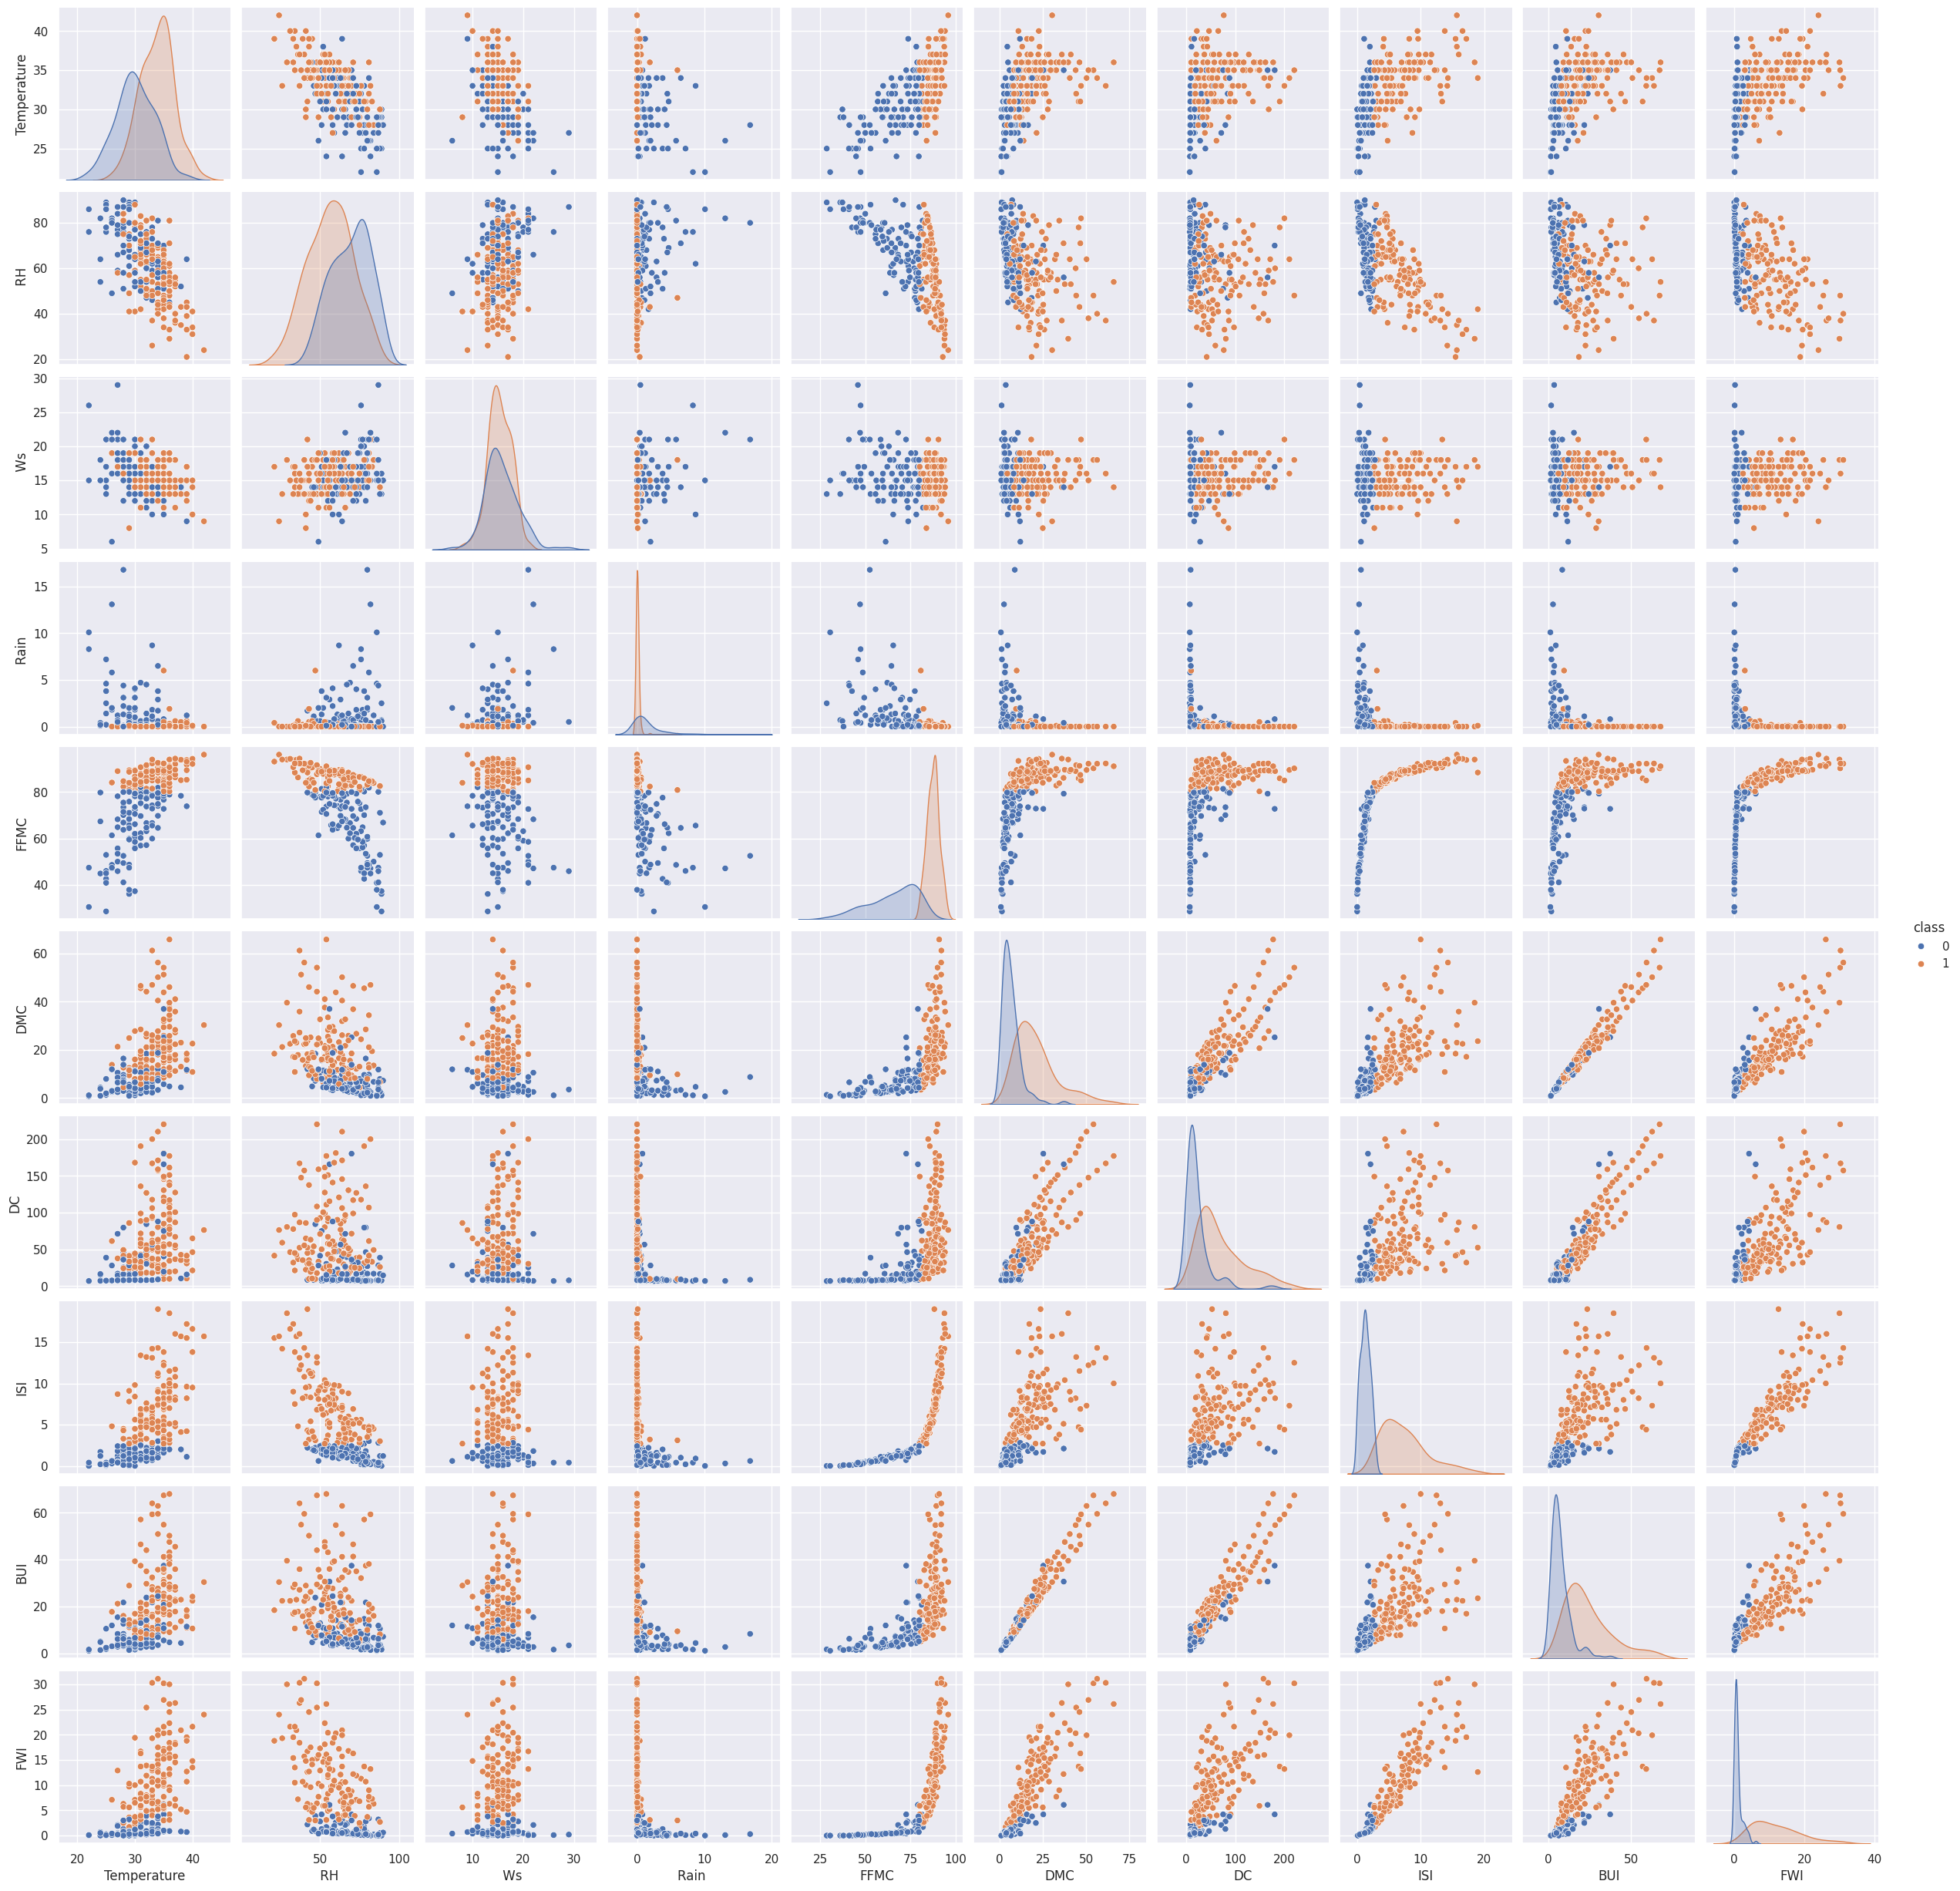

In [7]:
sns.pairplot(df, hue='class')
plt.show()

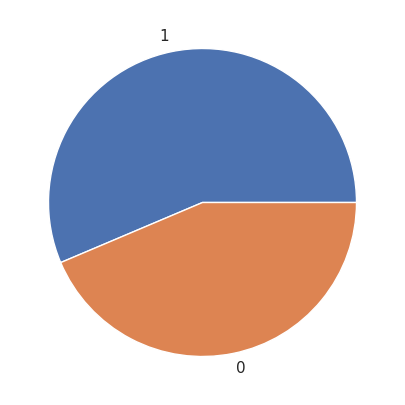

In [8]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [9]:
X = df.drop(columns=['class'])
X.head(10)

Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI
0           29   57   18    0.0  65.7   3.4   7.6  1.3   3.4  0.5
1           29   61   13    1.3  64.4   4.1   7.6  1.0   3.9  0.4
2           26   82   22   13.1  47.1   2.5   7.1  0.3   2.7  0.1
3           25   89   13    2.5  28.6   1.3   6.9  0.0   1.7  0.0
4           27   77   16    0.0  64.8   3.0  14.2  1.2   3.9  0.5
5           31   67   14    0.0  82.6   5.8  22.2  3.1   7.0  2.5
6           33   54   13    0.0  88.2   9.9  30.5  6.4  10.9  7.2
7           30   73   15    0.0  86.6  12.1  38.3  5.6  13.5  7.1
8           25   88   13    0.2  52.9   7.9  38.8  0.4  10.5  0.3
9           28   79   12    0.0  73.2   9.5  46.3  1.3  12.6  0.9

In [10]:
X.describe().transpose()

count       mean        std   min    25%   50%    75%    max
Temperature  243.0  32.152263   3.628039  22.0  30.00  32.0  35.00   42.0
 RH          243.0  62.041152  14.828160  21.0  52.50  63.0  73.50   90.0
 Ws          243.0  15.493827   2.811385   6.0  14.00  15.0  17.00   29.0
Rain         243.0   0.762963   2.003207   0.0   0.00   0.0   0.50   16.8
FFMC         243.0  77.842387  14.349641  28.6  71.85  83.3  88.30   96.0
DMC          243.0  14.680658  12.393040   0.7   5.80  11.3  20.80   65.9
DC           243.0  49.430864  47.665606   6.9  12.35  33.1  69.10  220.4
ISI          243.0   4.742387   4.154234   0.0   1.40   3.5   7.25   19.0
BUI          243.0  16.690535  14.228421   1.1   6.00  12.4  22.65   68.0
FWI          243.0   7.035391   7.440568   0.0   0.70   4.2  11.45   31.1

**Standardize the Data**

In [11]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature        RH        Ws     Rain       FFMC       DMC        DC  \
0    -0.870655 -0.340673  0.893277 -0.381657 -0.847927 -0.912120 -0.879401   
1    -0.870655 -0.070359 -0.888877  0.268642 -0.938709 -0.855520 -0.879401   
2    -1.699254  1.348788  2.319000  6.171355 -2.146802 -0.984891 -0.889913   
3    -1.975454  1.821837 -0.888877  0.868918 -3.438694 -1.081920 -0.894117   
4    -1.423054  1.010896  0.180416 -0.381657 -0.910776 -0.944463 -0.740651   
5    -0.318255  0.335111 -0.532446 -0.381657  0.332234 -0.718063 -0.572469   
6     0.234145 -0.543409 -0.888877 -0.381657  0.723293 -0.386550 -0.397980   
7    -0.594455  0.740582 -0.176015 -0.381657  0.611562 -0.208664 -0.234002   
8    -1.975454  1.754259 -0.888877 -0.281611 -1.741776 -0.548264 -0.223490   
9    -1.146855  1.146053 -1.245307 -0.381657 -0.324187 -0.418892 -0.065819   

        ISI       BUI       FWI  
0 -0.830356 -0.936012 -0.880159  
1 -0.902720 -0.900798 -0.893626  
2 -1.071571 -0.985310 -0.934029  
3 -1.143935 -1.055737 -0.947497  
4 -0.854477 -0.900798 -0.880159  
5 -0.396169 -0.682475 -0.610807  
6  0.399841 -0.407810  0.022169  
7  0.206869 -0.224700  0.008701  
8 -1.047449 -0.435980 -0.907094  
9 -0.830356 -0.288084 -0.826288

**Observations and variables**

In [12]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

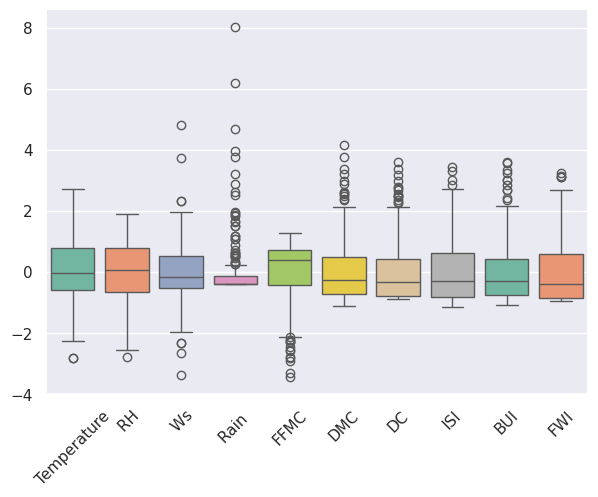

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
# Rotate x-axis tick labels
ax.tick_params(axis='x', labelrotation=45)

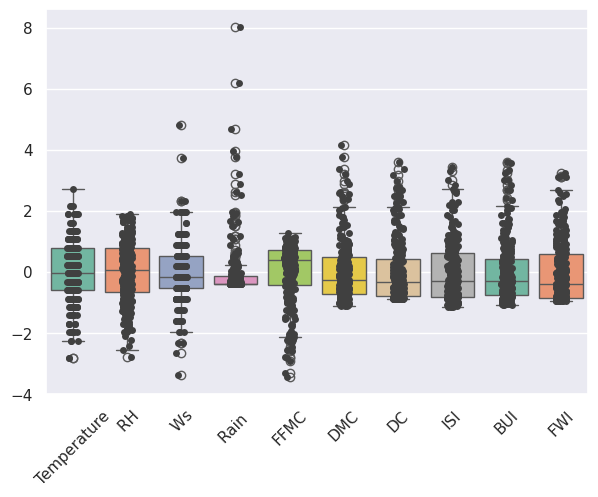

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.tick_params(axis='x', labelrotation=45)

**Correlation Matrix**

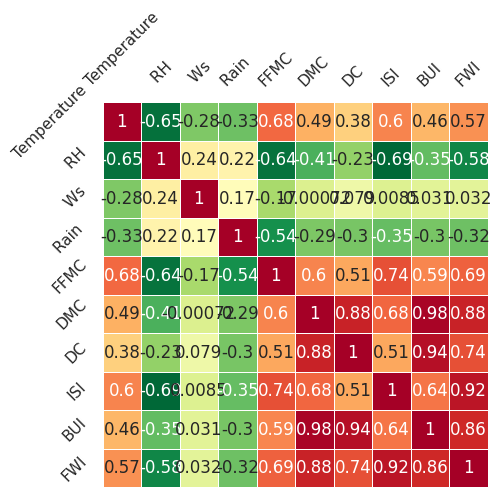

In [15]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=45)

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

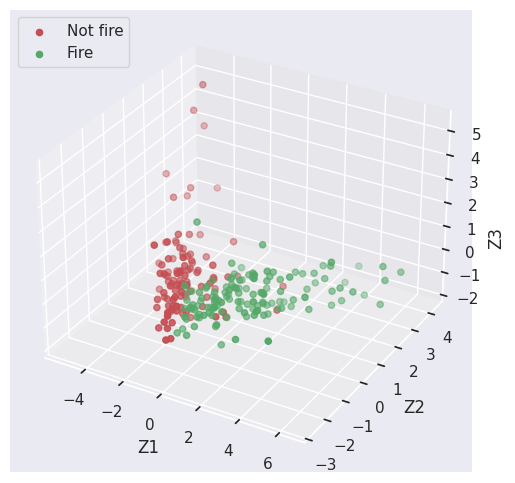

In [16]:
pca = PCA(n_components=3)
Z = pca.fit_transform(X)

idx_Notfire = (y == 0)
idx_Fire = (y == 1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z[idx_Notfire, 0], Z[idx_Notfire, 1], Z[idx_Notfire, 2],
           c='r', label='Not fire')
ax.scatter(Z[idx_Fire, 0], Z[idx_Fire, 1], Z[idx_Fire, 2],
           c='g', label='Fire')

ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
#ax.set_zlabel('Z3')
fig.text(0.82, 0.5, "Z3", rotation=90, va='center', fontsize=12)
ax.legend(loc='upper left')

plt.show()

**Eigenvectors**

[[ 0.2983451  -0.34819133  0.11683068]
 [-0.277016    0.39876628 -0.42130133]
 [-0.04037637  0.53915323  0.42002406]
 [-0.19606535  0.21525723  0.64608294]
 [ 0.3484669  -0.23218813 -0.04129858]
 [ 0.37431571  0.26629772 -0.08926312]
 [ 0.32989522  0.37434607 -0.24948468]
 [ 0.36380727 -0.07337363  0.31126535]
 [ 0.37002287  0.31339818 -0.14471891]
 [ 0.39311006  0.11901043  0.15895484]]


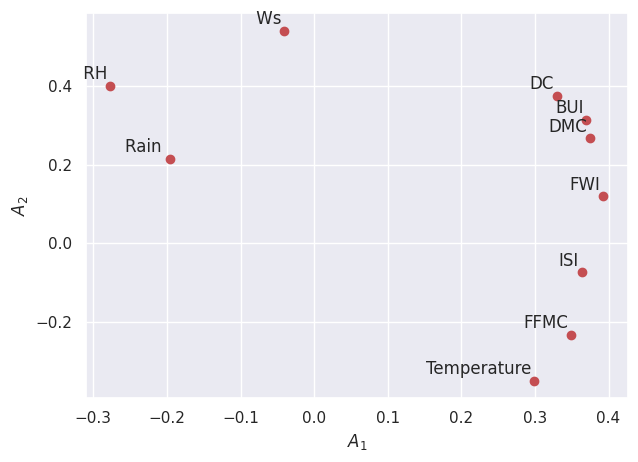

In [17]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

print(A)

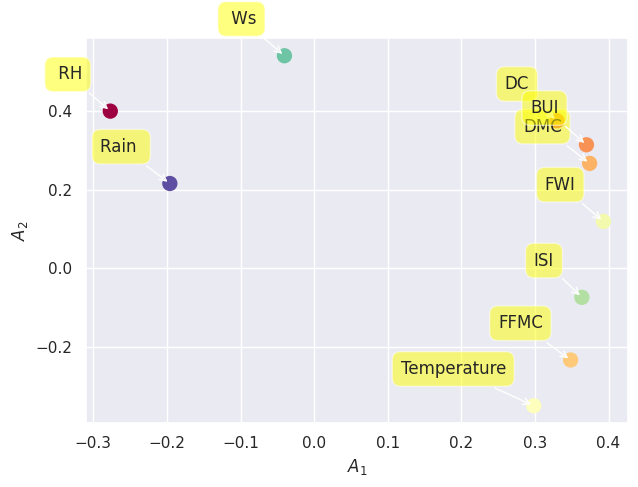

In [18]:
plt.scatter(A[:, 0], A[:, 1], marker='o', c=A[:, 2], s=100, cmap='Spectral')

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')

for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

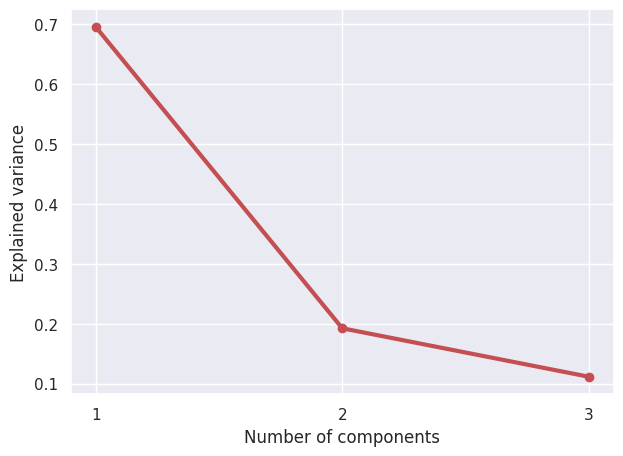

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [20]:
Lambda

array([5.75052057, 1.58982968, 0.92093853])

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

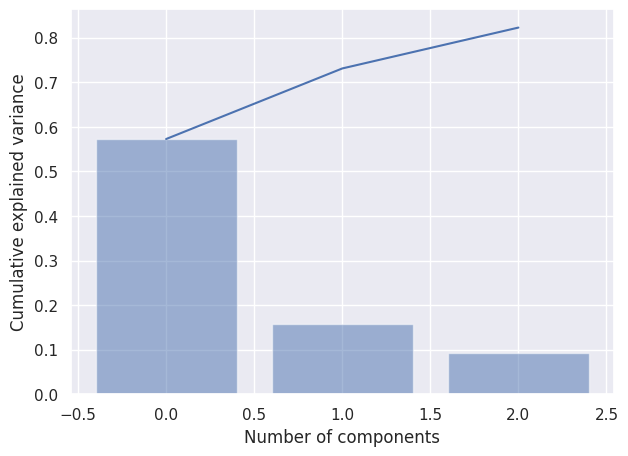

In [21]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

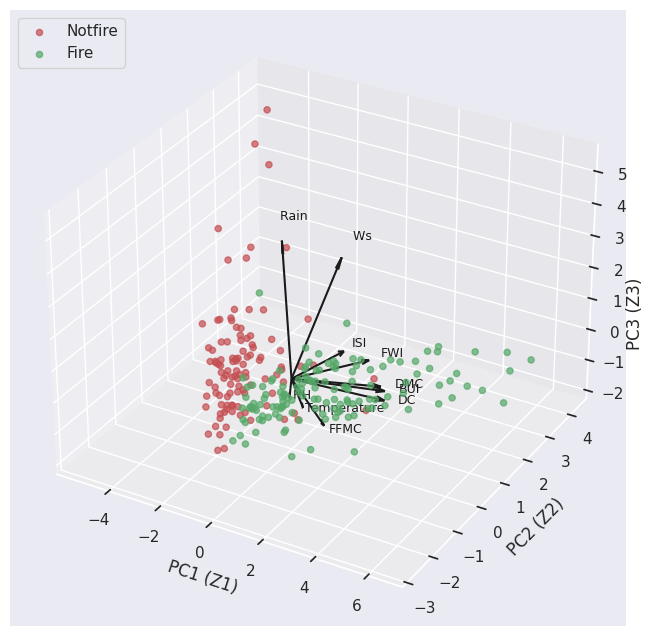

In [22]:
import matplotlib.pyplot as plt


A1 = A[:,0]
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0]
Z2 = Z[:,1]
Z3 = Z[:,2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PC1 (Z1)')
ax.set_ylabel('PC2 (Z2)')
fig.text(0.82, 0.5, "PC3 (Z3)", rotation=90, va='center', fontsize=12)

ax.quiver(0, 0, 0,
          A1 * max(Z1), A2 * max(Z2), A3 * max(Z3),
          color='k', arrow_length_ratio=0.1, linewidth=1.5)

# اضافه کردن نام متغیرها
for i in range(len(A1)):
    ax.text(A1[i]*max(Z1)*1.15,
            A2[i]*max(Z2)*1.15,
            A3[i]*max(Z3)*1.15,
            variables[i], color='k', fontsize=9)

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1], Z[idx_Notfire,2], c='r', label='Notfire', alpha=0.7)
ax.scatter(Z[idx_Fire,0],    Z[idx_Fire,1],    Z[idx_Fire,2],    c='g', label='Fire',    alpha=0.7)

ax.legend(loc='upper left')
plt.show()

##**Using PCA Library**

In [23]:
!pip install pca

In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.85)
# Fit transform
out = model.fit_transform(X)

[15-12-2025 01:58:45] [pca.pca] [INFO] Extracting column labels from dataframe.
[15-12-2025 01:58:45] [pca.pca] [INFO] Extracting row labels from dataframe.
[15-12-2025 01:58:45] [pca.pca] [INFO] PCA reduction performed to capture at least 85.0% explained variance using 10 columns of the input data.
[15-12-2025 01:58:45] [pca.pca] [INFO] Fit using PCA.
[15-12-2025 01:58:45] [pca.pca] [INFO] Compute loadings and PCs.
[15-12-2025 01:58:45] [pca.pca] [INFO] Compute explained variance.
[15-12-2025 01:58:45] [pca.pca] [INFO] The top 4 principal component(s) explains >= 85.00% of the explained variance.
[15-12-2025 01:58:45] [pca.pca] [INFO] The PCA reduction is performed on 10 variables (columns) of the input dataframe.
[15-12-2025 01:58:45] [pca.pca] [INFO] Fit using PCA.
[15-12-2025 01:58:45] [pca.pca] [INFO] Compute loadings and PCs.
[15-12-2025 01:58:45] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[15-12-2025 01:58:45] [pca.pca] [INF

**Principal Components**

In [25]:
out['PC']

PC1       PC2       PC3       PC4
0   -2.048061 -0.145619  0.243349 -1.058268
1   -2.207526 -0.807806 -0.229999  0.527216
2   -4.716158  3.269965  4.253647  2.228598
3   -4.306025  0.938032 -0.702527  1.309184
4   -2.542470  0.272066 -0.731763 -0.636334
..        ...       ...       ...       ...
238  0.009070 -0.215110 -0.661165 -0.060188
239 -3.641274  1.200053  0.246995  1.458970
240 -3.553392  3.359554  1.113895 -3.133233
241 -1.903105  0.150995  0.129993 -1.342175
242 -2.427086  0.054274 -0.577739 -0.418390

[243 rows x 4 columns]

**Scatter plot**

[15-12-2025 01:58:45] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[15-12-2025 01:58:45] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 4 Principal Component(s) explains [90.23%] of the variance.'}, xlabel='PC1 (57.2% expl.var)', ylabel='PC2 (15.8% expl.var)'>)

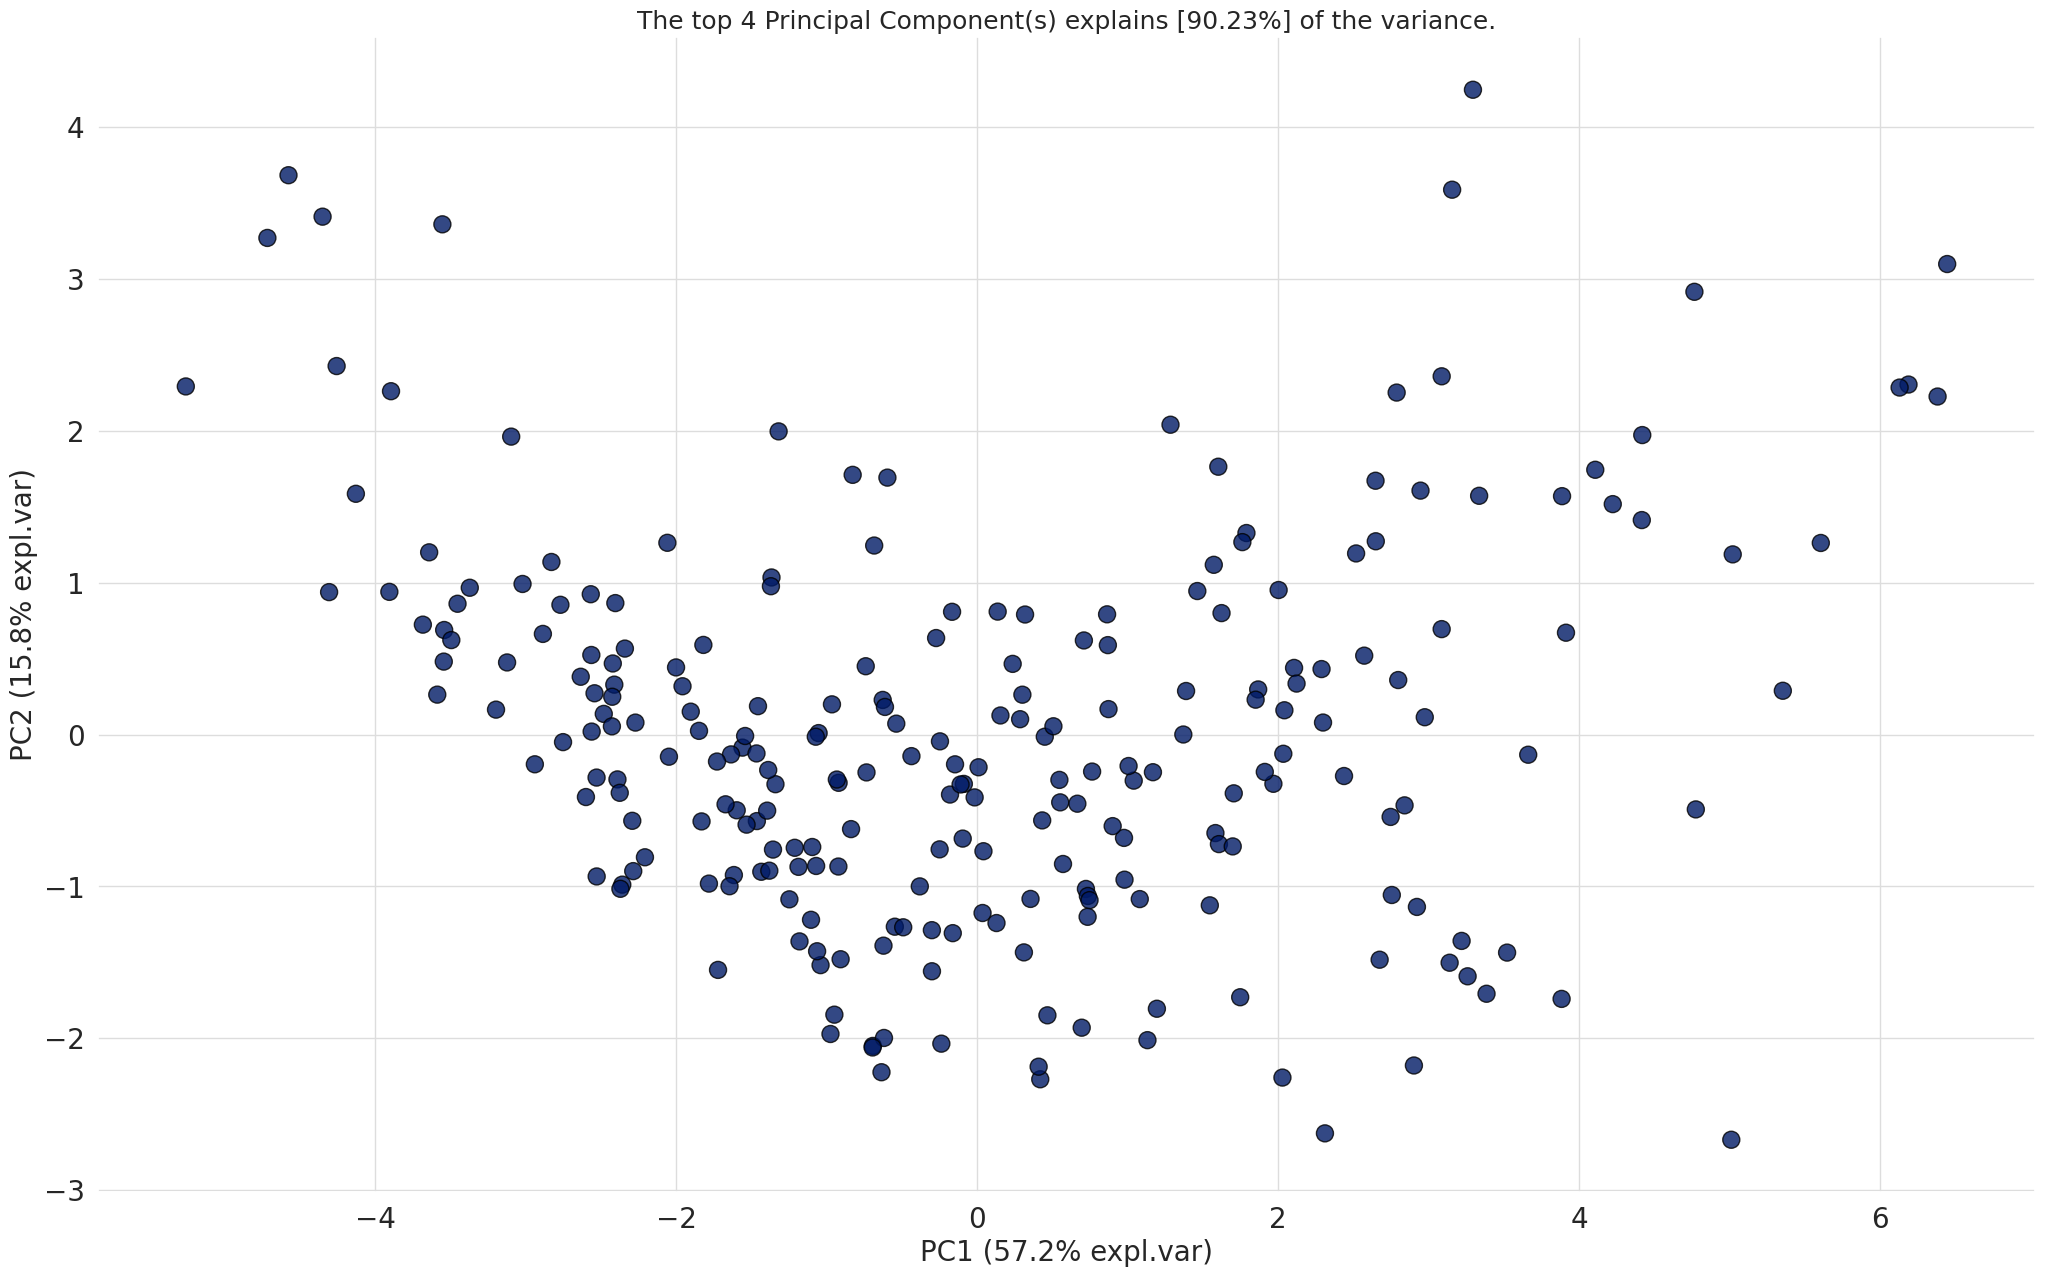

In [26]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [27]:
A = out['loadings'].T

/tmp/ipython-input-28-2612628088.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],


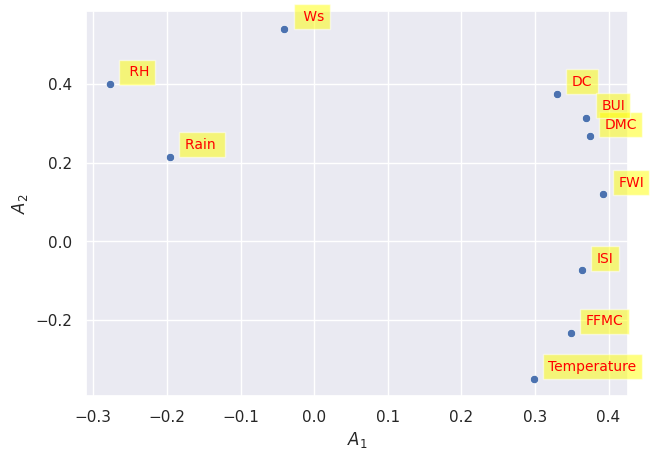

In [28]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

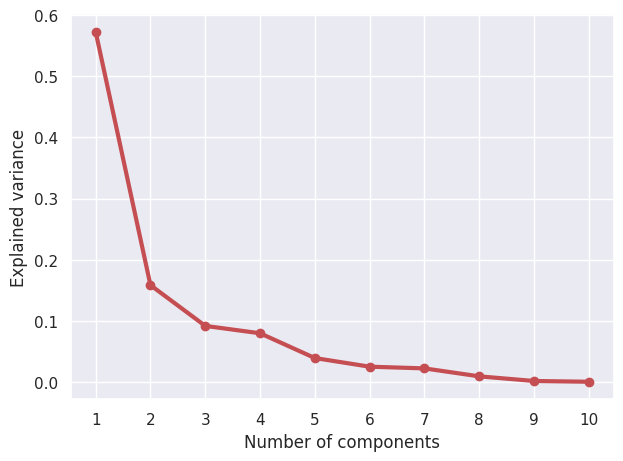

In [29]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

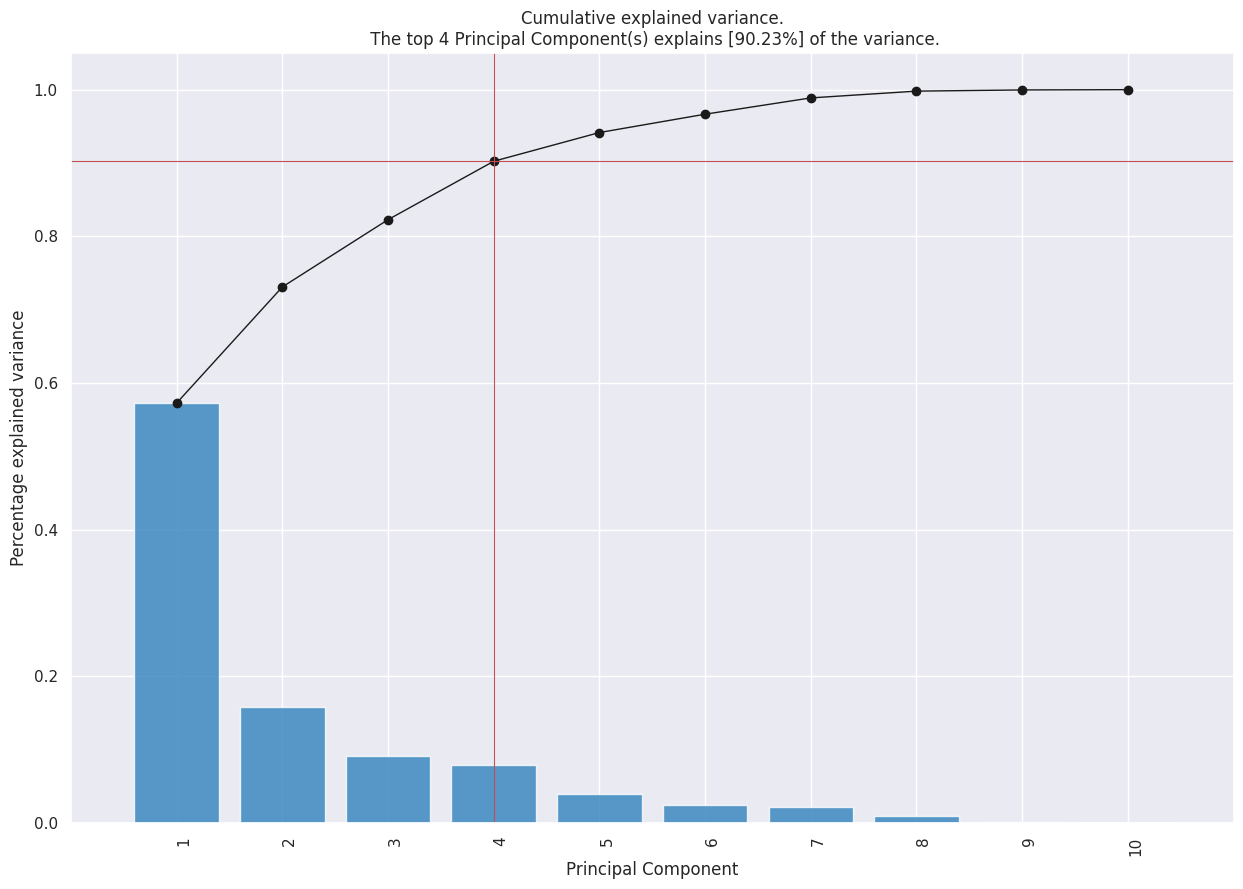

In [30]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[15-12-2025 01:58:48] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[15-12-2025 01:58:48] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[15-12-2025 01:58:49] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': 'The top 4 Principal Component(s) explains [90.23%] of the variance.'}, xlabel='PC1 (57.2% expl.var)', ylabel='PC2 (15.8% expl.var)', zlabel='PC3 (9.17% expl.var)'>)

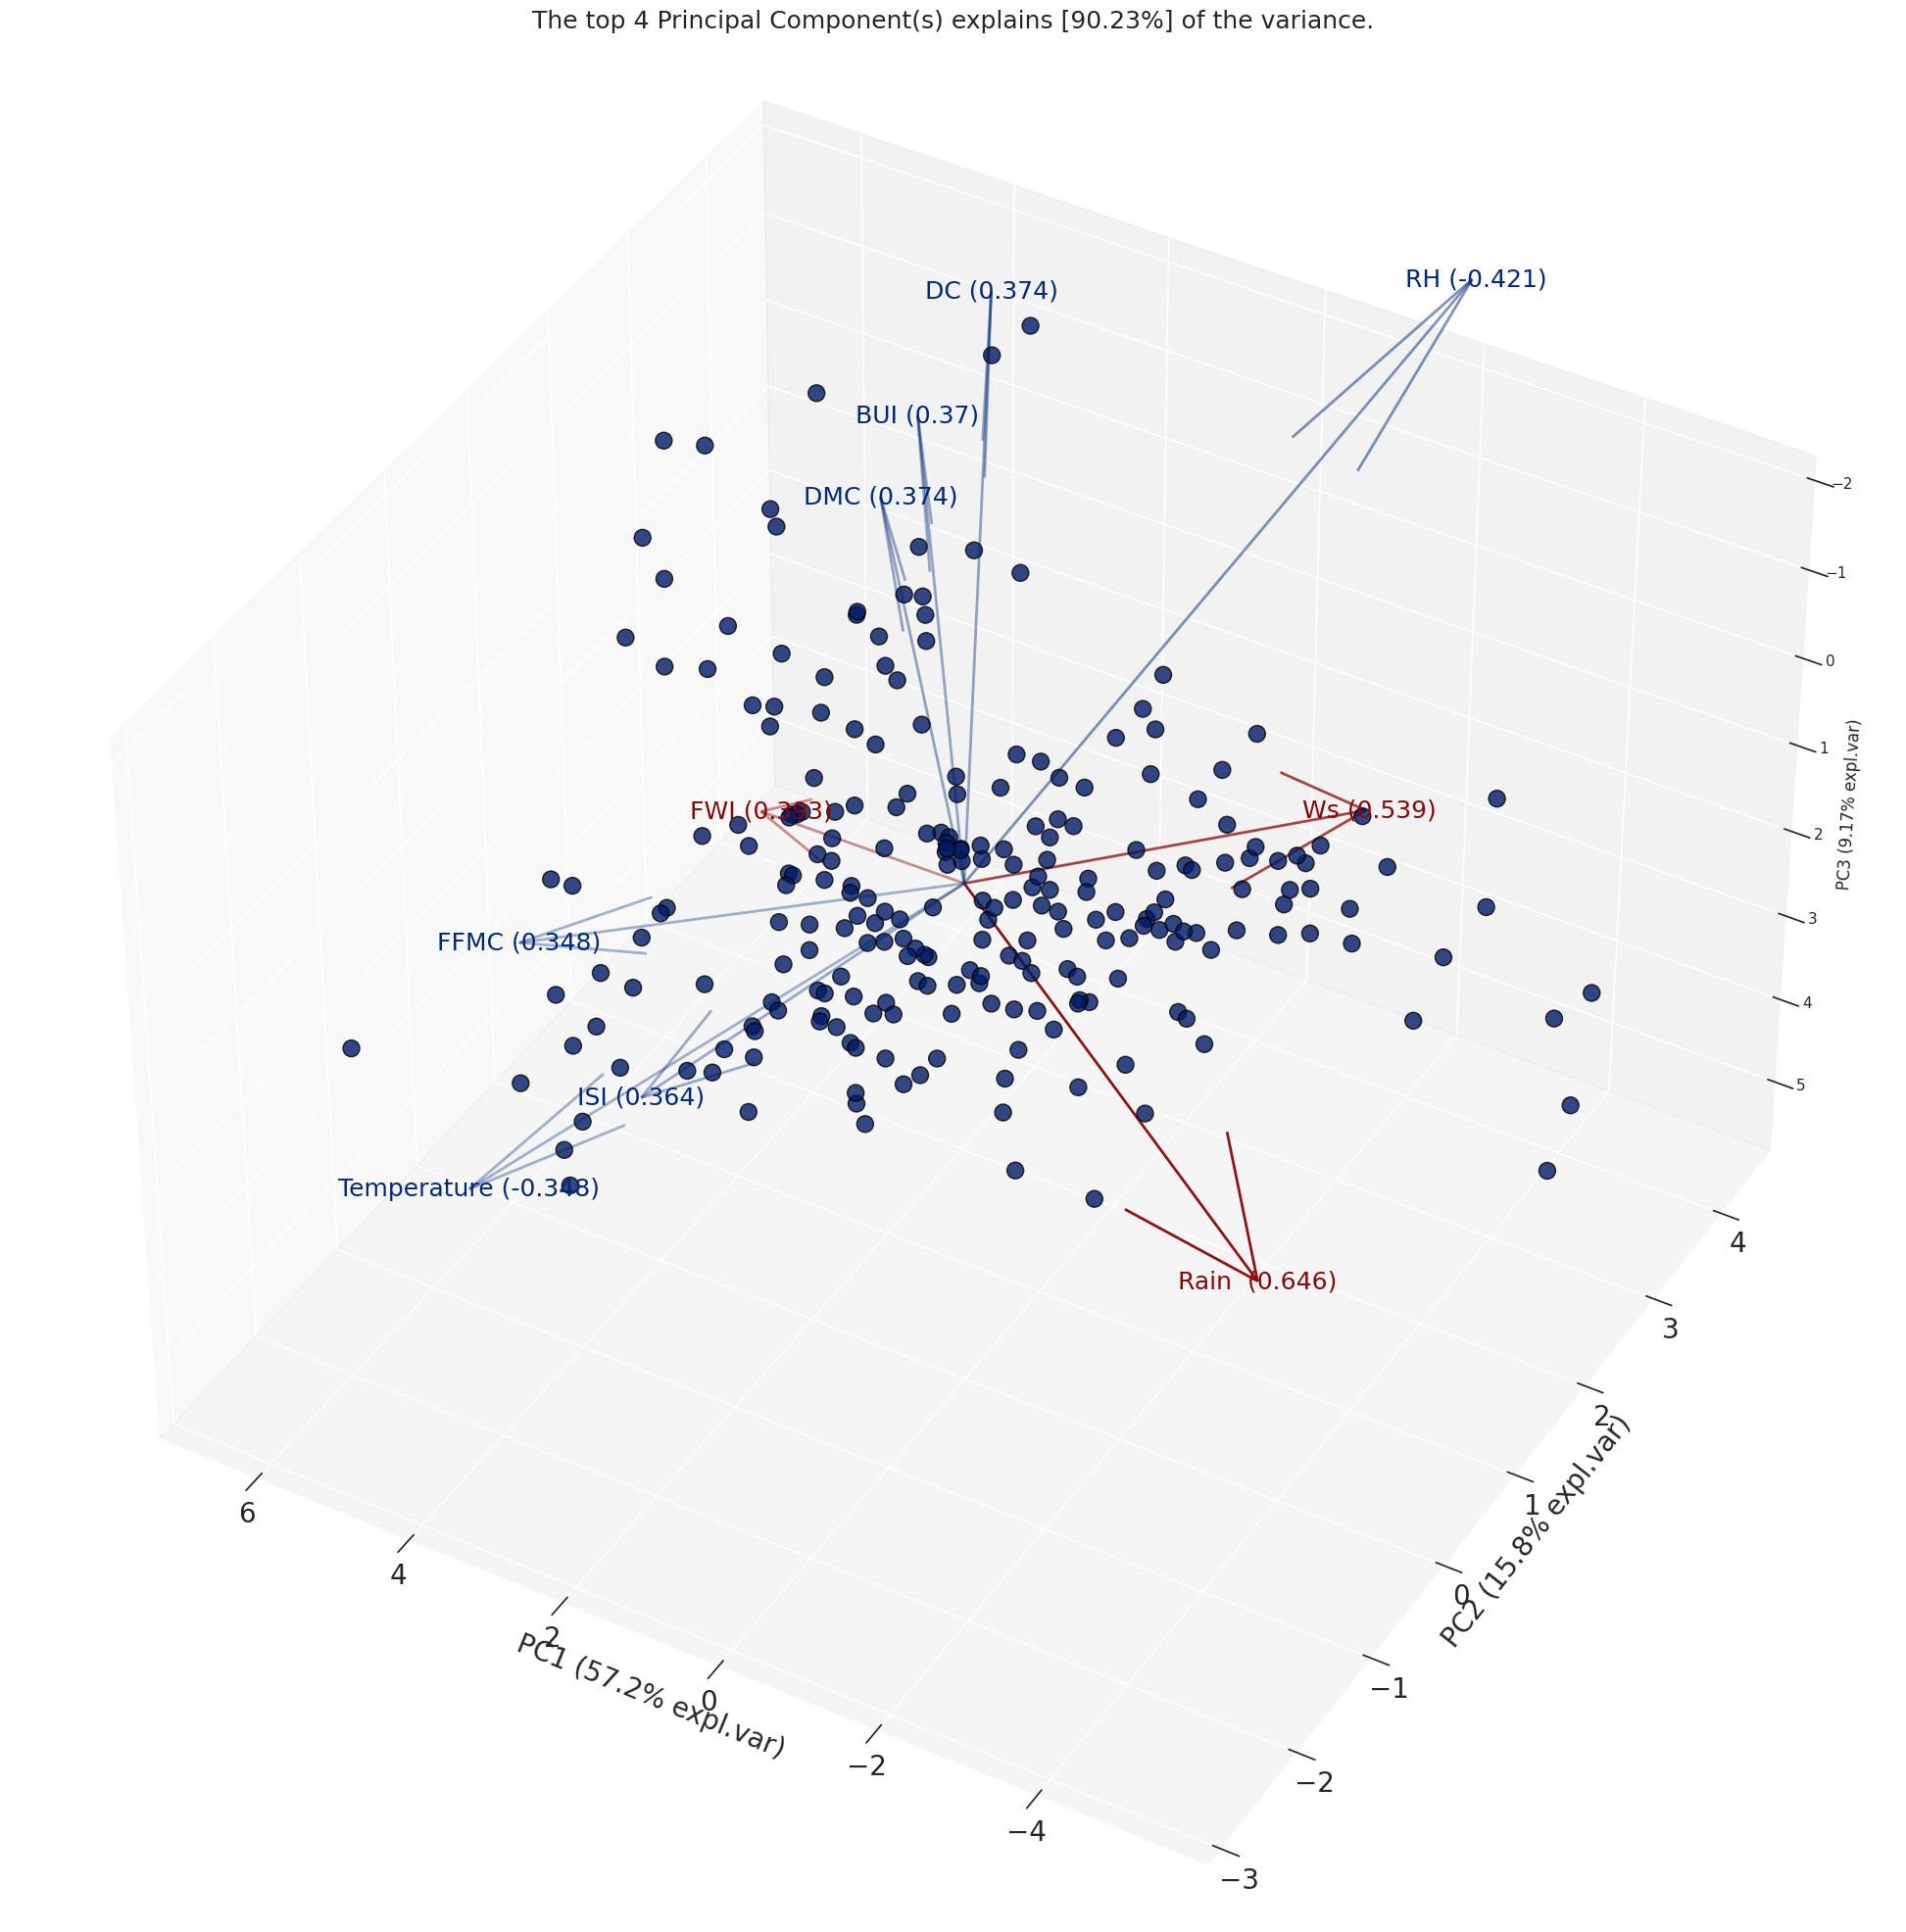

In [31]:
model.biplot3d(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [32]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (219, 11)
Unseen Data For Predictions: (24, 11)


## **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [33]:
# install slim version (default)
!pip install pycaret

**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [34]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [35]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [37]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [39]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

How to analyze model performance using various plots

In [41]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [42]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [43]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate K Neighbors Model**

In [44]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [45]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [47]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Logistic Regression Model**

In [48]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [50]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [51]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Random Forest Model**

In [52]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create SVM Model**

In [53]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune SVM Model**

In [54]:
tuned_svm = tune_model(svm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate SVM Model**

In [55]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [56]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [57]:
tuned_best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [58]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [59]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [60]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [62]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
tuned_best_model_pca

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [64]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

In [65]:
 rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

## **Install Analysis Extras for Explainable AI**

In [67]:
!pip install pycaret[analysis]

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

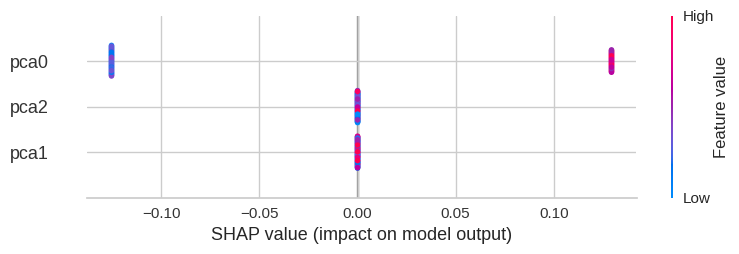

In [68]:
interpret_model(tuned_rf_pca, plot='summary')

In [69]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [70]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [71]:
interpret_model(tuned_rf_pca, plot='reason')